# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani
## Group 17

## Assignment 2 - Classification

#### Original author: Tony Vu Nguyen (301286979) - tvn4@sfu.ca
#### Created: Mar 3, 2022
#### Modified: Mar 3, 2022

In [3]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python


## 1. Getting Started

In [4]:
# Load dataset
df = pd.read_csv('datasets\heart_failure_dataset.csv', header=0)

In [24]:
## 1.1 Deceased patients (target) that had anaemia and were smokers (features)

df_d = df[df['death_event']==1] # Number of deceased patients
df_da = df_d[df_d['anaemia']==1] # Number of deceased patients with anemia
df_das = df_da[df_da['smoking']==1] # Number of deceased patients with anemia and were smokers

print('Percent of deceased patients that had anaemia and were smokers: %.1f%%' %(len(df_das)/len(df_d)*100))

Percent of deceased patients that had anaemia and were smokers: 12.5%


[<bound method NDFrame._add_numeric_operations.<locals>.mean of 14       80
20       52
23       63
33      159
38     2656
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 203, dtype: int64>, <bound method NDFrame._add_numeric_operations.<locals>.mean of 0       582
1      7861
2       146
3       111
4       160
       ... 
220     582
230     166
246    2017
262     258
266    1199
Name: creatinine_phosphokinase, Length: 96, dtype: int64>]


<AxesSubplot:title={'center':'creatinine_phosphokinase'}, xlabel='[death_event]'>

<Figure size 432x288 with 0 Axes>

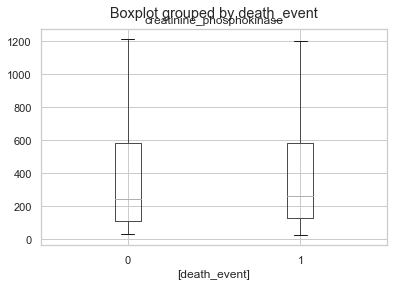

In [26]:
## 1.2a: Mean
df_a = df[df['death_event']==0] # Number of alive patients
df_CPK = df[['creatinine_phosphokinase', 'death_event']] 

CPK_mean = [df_a['creatinine_phosphokinase'].mean, df_d['creatinine_phosphokinase'].mean]
# print(CPK_mean)

plt.figure()
df_CPK.boxplot(by='death_event', showfliers=False)
# # Boxplot
# sns.set_theme(style='whitegrid')
# ax = sns.boxplot(x='death_event', y='creatinine_phosphokinase', data=df_a)

In [25]:
## 1.2b: T-test
from scipy.stats import ttest_ind
T, P = ttest_ind(df_a['creatinine_phosphokinase'],df_d['creatinine_phosphokinase'])
print(P)


0.27961124573614


## 2. Logistic Regression